In [1]:
from hdimvis.algorithms.spring_force_algos.hybrid_algo.Hybrid import Hybrid
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from experiments.cube.Cube import Cube
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
from hdimvis.visualise_layouts_and_metrics.plot import show_layout,show_generation_metrics


In [2]:
rna = DataFetcher.fetch_data('rna N3k')
dataset = rna

####################
Fetching the "rna n3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################


In [3]:
hybrid_correct = Hybrid(dataset=dataset, alpha=0.6,
                    use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=True,
                        use_random_sample=True)
print(hybrid_correct.initial_sample_size)
hybrid_layout_correct = LayoutCreation().create_layout(hybrid_correct, optional_metric_collection=None)



####################
The algorithm will use a random initialization for the low D embedding/layout
355
####################
A 2D layout of the "rna n3k" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


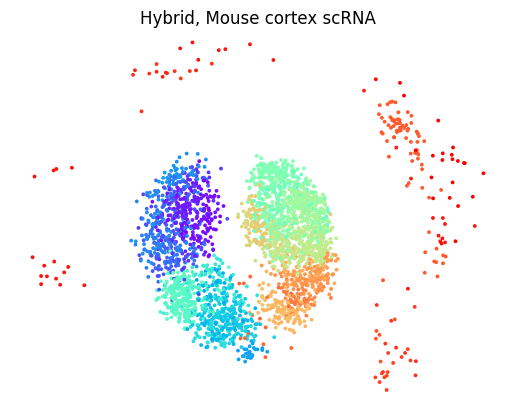

In [5]:
show_layout(hybrid_layout_correct, use_labels=True, title="Hybrid, Mouse cortex scRNA")

In [13]:
hybrid = Hybrid(dataset=dataset, alpha=0.6,
                    use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=False,
                use_random_sample=False)
print(hybrid_correct.initial_sample_size)
hybrid_layout = LayoutCreation().create_layout(hybrid, optional_metric_collection=None)


####################
The algorithm will use a random initialization for the low D embedding/layout
55
####################
A 2D layout of the "rna n3k" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


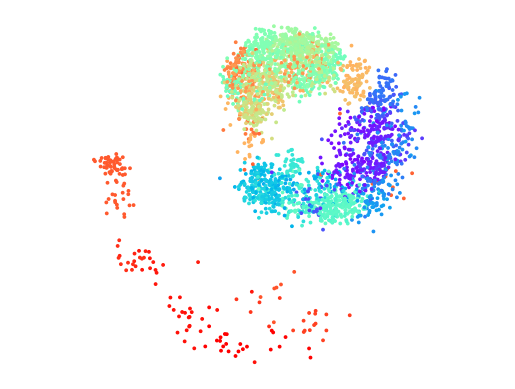

In [14]:
show_layout(hybrid_layout, use_labels=True)

In [9]:
num_repeats = 20
layouts = [[],[]]


for i in range(num_repeats):
    hybrid_correct = Hybrid(dataset=dataset, alpha=0.6,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=True,
                            use_random_sample=True)
    hybrid_layout_correct = LayoutCreation().create_layout(hybrid_correct, optional_metric_collection=None)
    layouts[0].append(hybrid_layout_correct)


    hybrid = Hybrid(dataset=dataset, alpha=0.6,
                        use_knnd=False, sample_set_size=10, neighbour_set_size=5, use_correct_interpolation_error=True,
                    use_random_sample=False)
    hybrid_layout = LayoutCreation().create_layout(hybrid, optional_metric_collection=None)
    layouts[1].append(hybrid_layout)

output_dir= (Path(PROJECT_ROOT).joinpath(Path(f"experiments/hybrid/out/"))).resolve().absolute()

path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"layouts_sampling.pickle"))).resolve()
with open(path_to_pickle_arr, 'wb') as pickle_out:
    pickle.dump(layouts, pickle_out)


####################
The algorithm will use a random initialization for the low D embedding/layout
 sample:355
 idices: 355
sample size 355
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Hybrid" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################
####################
The algorithm will use a random initialization for the low D embedding/layout
[116, 96, 118, 51, 65, 63, 77, 28, 12, 23, 122, 149, 116, 102, 74, 47, 159, 206, 271, 244, 291, 261, 207, 266, 299, 296, 239, 271, 238, 268, 214, 288, 261, 444, 394, 415, 345,

In [10]:
import numpy as np
from experiments.utils.get_f1_for_best_k_with_knn import get_f1_for_best_k_with_knn
from experiments.utils.get_kmeans_f1 import get_kmeans_f1



results_arr = np.zeros((2,20,4))
for j in range(2):
    for i,layout in enumerate(layouts[j]):
        print(f"Layout: {i}")
        stress = layout.get_final_stress()
        kmeans_f1 = get_kmeans_f1(layout.get_final_positions(), layout.labels)
        k, f1_for_best_k_with_knn =  get_f1_for_best_k_with_knn(lower_bound=1, upper_bound=30,
                                                            cross_validation_folds=10,
                                                             data=layout.data,
                                                             labels=layout.labels)

        results_arr[j,i,0] = stress
        results_arr[j,i,1] = kmeans_f1
        results_arr[j,i,2],results_arr[j,i,3] =k,  f1_for_best_k_with_knn

print(results_arr)
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/hybrid/out/"))).resolve().absolute()

path_to_pickle_arr = (Path(output_dir).joinpath(Path(f"results_arr_sampling.pickle"))).resolve()
with open(path_to_pickle_arr, 'wb') as pickle_out:
    pickle.dump(results_arr, pickle_out)

Layout: 0

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 1

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 2

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 3

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 4

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 5

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 6

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 7

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 8

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 9

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 10

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 11

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 12

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 13

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 14

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 15

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 16

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 17

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 18

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 19

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 0

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 1

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 2

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 3

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 4

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 5

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 6

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 7

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 8

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 9

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 10

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 11

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 12

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 13

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 14

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 15

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 16

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 17

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 18

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Layout: 19

 Computing vectorised euclidean stress 



C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[[0.29727961 0.16463984 1.         0.79959343]
  [0.27918861 0.15301768 1.         0.79959343]
  [0.30362706 0.16264741 1.         0.79959343]
  [0.29434965 0.14917214 1.         0.79959343]
  [0.27257203 0.16931541 1.         0.79959343]
  [0.29354046 0.14472793 1.         0.79959343]
  [0.28123211 0.16029247 1.         0.79959343]
  [0.28114483 0.16150954 1.         0.79959343]
  [0.28342204 0.1580563  1.         0.79959343]
  [0.27552342 0.1458173  1.         0.79959343]
  [0.30003393 0.1718914  1.         0.79959343]
  [0.29480733 0.16697857 1.         0.79959343]
  [0.28365346 0.16301208 1.         0.79959343]
  [0.29291674 0.17014038 1.         0.79959343]
  [0.27480115 0.16649718 1.         0.79959343]
  [0.27195879 0.14513202 1.         0.79959343]
  [0.30080933 0.18102756 1.         0.79959343]
  [0.27376975 0.18539743 1.         0.79959343]
  [0.28929622 0.14345766 1.         0.79959343]
  [0.27855897 0.17370601 1.         0.79959343]]

 [[0.30448402 0.15513114 1.         0.

In [12]:
from scipy import stats
for j,metric in enumerate(["stress", "kmeans", "k", "knn"]):

        if j != 2:
            mean_squad = np.mean(results_arr[0,:,j])
            sd_squad = np.std(results_arr[0,:,j])

            mean_96 = np.mean(results_arr[1,:,j])
            sd_96 = np.std(results_arr[1,:,j])

            if j == 3:
                tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=4), results_arr[1,:,j].round(decimals=4), equal_var=False, alternative='greater')
                result = np.format_float_scientific(pvalue, precision=2,min_digits=2)

            else:
                tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=4), results_arr[1,:,j].round(decimals=4), equal_var=False, alternative='less')
                result = np.format_float_scientific(pvalue, precision=2,min_digits=2)
            print(20*"#")
            print(f"Metric : {metric}")
            print(20*"#")


            print(f"random mean : {mean_squad.round(decimals=2)} (SD {sd_squad.round(decimals=2)})")
            print(f"stratified mean : {mean_96.round(decimals=2)} (SD {sd_96.round(decimals=2)})")
            print(f"test: {result}")
        else:
            print(f"random mean k: {np.mean(results_arr[0,:,j])}")
            print(f"stratified mean k: {np.mean(results_arr[1,:,j])}")


####################
Metric : stress
####################
random mean : 0.29 (SD 0.01)
stratified mean : 0.28 (SD 0.01)
test: 8.39e-01
####################
Metric : kmeans
####################
random mean : 0.16 (SD 0.01)
stratified mean : 0.16 (SD 0.01)
test: 7.74e-01
random mean k: 1.0
stratified mean k: 1.0
####################
Metric : knn
####################
random mean : 0.8 (SD 0.0)
stratified mean : 0.8 (SD 0.0)
test: nan


C:\Users\Owner\AppData\Local\Temp\ipykernel_20580\881580366.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat, pvalue = stats.ttest_ind(results_arr[0,:,j].round(decimals=4), results_arr[1,:,j].round(decimals=4), equal_var=False, alternative='greater')
